In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5061,4135-FRWKJ,Female,1,Yes,Yes,55,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,One year,No,Electronic check,76.25,4154.55,No
4086,2235-EZAIK,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),79.20,5401.9,No
5646,5510-BOIUJ,Male,0,No,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.25,19.25,Yes
4906,8639-NHQEI,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Two year,Yes,Bank transfer (automatic),95.90,6954.15,No


In [5]:
df.shape

(7043, 21)

In [6]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [7]:
df.drop("customerID", axis = "columns", inplace = True)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
#convert the object datatypeit to numeric
pd.to_numeric(df.TotalCharges)

In [11]:
# some of the data has space ...what to do isto make those with space to become null using errors = coerce
pd.to_numeric(df.TotalCharges, errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [12]:
pd.to_numeric(df.TotalCharges, errors="coerce").isnull()
#those places that are converted to null must be in the hidden space....u get now????

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [13]:
#to make those with null visible now...shey u dey get the gist
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()].shape

(11, 20)

In [15]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [16]:
df.iloc[488]["TotalCharges"]

' '

In [17]:
# i can drop the rows where totalcharges is null since it is small compare to the dataset
df1 = df[df.TotalCharges !=' ']
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [18]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
# aftyer removing one with space we can convert it now
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
df1.TotalCharges
# have converted it to float a fu**ing numeric

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [21]:
df1.TotalCharges.dtype

dtype('float64')

In [22]:
df1[df1.Churn == "No"]
#customer that stop using

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


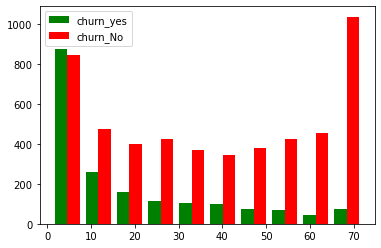

In [23]:
tenure_churn_no = df1[df1.Churn == "No"].tenure
tenure_churn_yes = df1[df1.Churn == "Yes"].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color =['green', 'red'], label = ['churn_yes','churn_No'])
plt.legend()

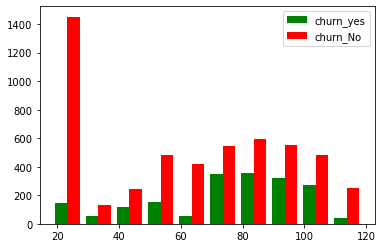

In [24]:
tenure_churn_no = df1[df1.Churn == "No"].MonthlyCharges
tenure_churn_yes = df1[df1.Churn == "Yes"].MonthlyCharges

plt.hist([tenure_churn_yes, tenure_churn_no], color =['green', 'red'], label = ['churn_yes','churn_No'])
plt.legend()

In [25]:
for column in df:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [26]:
#To print the uniqueness in all the column
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [27]:
for column in df:
    if df[column].dtypes == 'object':
        print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [28]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [29]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [30]:
# To replace a data by another...example, No nternet service in ONLINESECURITY want to be change to no
df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace=True)

C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [31]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [32]:
#Convert Yes and No to 1 or 0

In [33]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [34]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [35]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [36]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [37]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5637,0,0,1,1,64,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1305,1,0,0,0,28,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
128,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4732,1,0,1,1,71,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
5907,0,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [39]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [40]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [41]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [42]:
#Train test split

In [43]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [44]:
X_train.shape

(5625, 26)

In [45]:
X_test.shape

(1407, 26)

In [46]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [47]:
len(X_train.columns)

26

In [48]:
#Build a model (ANN) in tensorflow/keras

In [49]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
 
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 6s 7ms/step - loss: 0.5312 - accuracy: 0.7029
Epoch 2/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4303 - accuracy: 0.7918
Epoch 3/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4217 - accuracy: 0.7986
Epoch 4/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4168 - accuracy: 0.8041
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4137 - accuracy: 0.8068
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4113 - accuracy: 0.8076: 0s -
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4083 - accuracy: 0.8107
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4066 - accuracy: 0.8069
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4048 - accuracy: 0.8092
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4027 - 

176/176 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.8340: 0s - loss: 0.3346 - ac
Epoch 81/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3524 - accuracy: 0.8348
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.8322
Epoch 83/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3507 - accuracy: 0.8343
Epoch 84/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3506 - accuracy: 0.8361
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3498 - accuracy: 0.8332
Epoch 86/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8329
Epoch 87/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8366
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3493 - accuracy: 0.8363
Epoch 89/100
176/176 [==============================] - 0s 3ms/step - l

In [50]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 6ms/step - loss: 0.4911 - accuracy: 0.7740


[0.4910736083984375, 0.7739872336387634]

In [51]:
yp = model.predict(X_test)
yp[:5]

array([[0.14191017],
       [0.7848252 ],
       [0.00430438],
       [0.7242091 ],
       [0.5125028 ]], dtype=float32)

In [52]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [53]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [54]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [55]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       999
           1       0.63      0.53      0.58       408

    accuracy                           0.77      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.77      0.77      1407



Text(0.5, 42.0, 'Predicted')

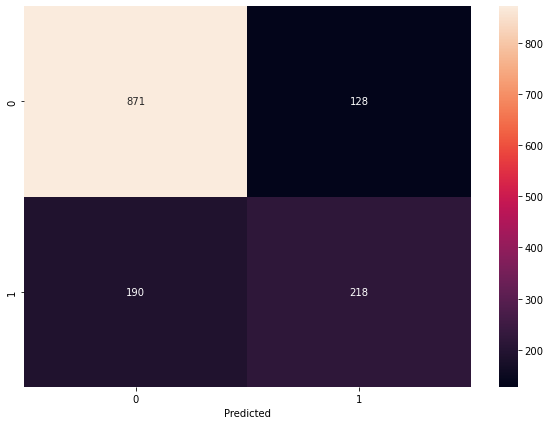

In [56]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')

In [57]:
y_test.shape

(1407,)

In [58]:
def ANN(x_train, x_test, y_train, y_test, loss, weights):
    modeld = keras.Sequential([
            keras.layers.Dense(26, input_shape=(26,), activation='relu'),
            keras.layers.Dense(15, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid')
        ])

# opt = keras.optimizers.Adam(learning_rate=0.01)

    modeld.compile(optimizer='adam',
                   loss = loss,
                  metrics=['accuracy'])
    if weights== -1:
        modeld.fit(x_train, y_train, epochs=100)
    else:
        modeld.fit(x_train, y_train, epochs=100, class_weight = weights)
        
    print(modeld.evaluate(x_test, y_test))
    
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print("classification: \n", classification_report(y_test,y_preds))
          
    return y_preds

In [59]:
y_preds = ANN(X_train, X_test, y_train, y_test, "binary_crossentropy", -1)

Epoch 1/100
176/176 [==============================] - 3s 6ms/step - loss: 0.5265 - accuracy: 0.7349
Epoch 2/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4256 - accuracy: 0.7943
Epoch 3/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4184 - accuracy: 0.7993
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4132 - accuracy: 0.8071
Epoch 5/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4109 - accuracy: 0.8087
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4078 - accuracy: 0.8084
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4080 - accuracy: 0.8101
Epoch 8/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4064 - accuracy: 0.8144
Epoch 9/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4045 - accuracy: 0.8130
Epoch 10/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4041 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3608 - accuracy: 0.8345
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3583 - accuracy: 0.8352
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3582 - accuracy: 0.8361
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3586 - accuracy: 0.8352
Epoch 85/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3584 - accuracy: 0.8343
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3566 - accuracy: 0.8389
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3569 - accuracy: 0.8370
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3560 - accuracy: 0.8357
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3575 - accuracy: 0.8341
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3547 - accuracy: 

# METHOD 1: UNDER SAMLPLING MAJORITY CLASS

# TO RANDOMLLY PICK FROM THE MAJORITY  CLASS AND DISCARD THE REMAINING DATA SO AS TO LET THE NUMBER OF DATA OF THE MAJORITY = MINORITY

In [60]:
#class_count
count_class_0, count_class_1 = df1.Churn.value_counts()

#divie buy class
df_class_0 = df2[df2['Churn']==0 ]
df_class_1 = df2[df2['Churn']==1 ]

In [61]:
count_class_0, count_class_1

(5163, 1869)

In [62]:
df_class_1 .shape

(1869, 27)

In [63]:
df_class_0 .shape

(5163, 27)

In [64]:
df_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6729,0,0,1,1,0.943662,1,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
4139,0,1,0,0,0.323944,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [65]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [66]:
df_class_0.sample(count_class_1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5977,0,0,0,0,0.788732,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3238,1,0,1,1,0.352113,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2726,0,0,0,1,0.366197,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6281,0,0,0,0,0.070423,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2027,1,0,1,0,0.323944,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6848,1,0,1,0,0.014085,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1497,1,0,1,1,0.704225,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0
2750,0,0,0,0,0.028169,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
341,1,0,1,0,0.985915,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0


In [67]:
df_class_0_under = df_class_0.sample(count_class_1)

In [68]:
df_test_under = pd.concat([df_class_0_under,df_class_1], axis = 0)

In [69]:
df_test_under.shape

(3738, 27)

In [70]:
print("random Under Sampling")
print(df_test_under.Churn.value_counts())

random Under Sampling
0    1869
1    1869
Name: Churn, dtype: int64


In [71]:
x = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=15, stratify = y)

In [72]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [73]:
y_preds = ANN(X_train, X_test, y_train, y_test, "binary_crossentropy", -1)

Epoch 1/100
94/94 [==============================] - 2s 7ms/step - loss: 0.5944 - accuracy: 0.6870
Epoch 2/100
94/94 [==============================] - 1s 7ms/step - loss: 0.5096 - accuracy: 0.7575
Epoch 3/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4975 - accuracy: 0.7625
Epoch 4/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4917 - accuracy: 0.7679
Epoch 5/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4861 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4838 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4790 - accuracy: 0.7702
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4777 - accuracy: 0.7682
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4739 - accuracy: 0.7722
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4728 - accuracy: 0.7719: 0s - los

94/94 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8077
Epoch 83/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8104
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8100
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8087
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8157
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8120
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8140
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4044 - accuracy: 0.8134
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8094
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8140
Epoch 92/100


# METHOD 2: OVER SAMPLING

In [74]:
count_class_0, count_class_1

(5163, 1869)

In [75]:
df_class_1.sample(2000, replace = True).shape

(2000, 27)

In [76]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)
df_class_1_over

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
418,1,0,1,1,0.295775,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6791,0,0,0,0,0.253521,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
6232,1,0,0,0,0.056338,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3830,0,0,1,0,0.042254,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1421,0,1,0,0,0.112676,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,1,0,0,1,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5043,0,1,0,0,0.253521,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
840,1,1,0,0,0.760563,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3790,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [77]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

print("random over Sampling")
print(df_test_over.Churn.value_counts())

random over Sampling
0    5163
1    5163
Name: Churn, dtype: int64


In [78]:
x = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=15, stratify = y)

In [79]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [80]:
y_preds = ANN(X_train, X_test, y_train, y_test, "binary_crossentropy", -1)

Epoch 1/100
259/259 [==============================] - 4s 7ms/step - loss: 0.5521 - accuracy: 0.7253
Epoch 2/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4798 - accuracy: 0.7736
Epoch 3/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4738 - accuracy: 0.7735
Epoch 4/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4694 - accuracy: 0.7769
Epoch 5/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4657 - accuracy: 0.7762
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4626 - accuracy: 0.7811
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4598 - accuracy: 0.7814
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4572 - accuracy: 0.7835
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4543 - accuracy: 0.7885
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4539 - accura

259/259 [==============================] - 1s 3ms/step - loss: 0.3774 - accuracy: 0.8299
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3768 - accuracy: 0.8314
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3746 - accuracy: 0.8308
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3726 - accuracy: 0.8346
Epoch 85/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3744 - accuracy: 0.8285
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3726 - accuracy: 0.8340
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3705 - accuracy: 0.8344
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3708 - accuracy: 0.8337
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3696 - accuracy: 0.8346
Epoch 90/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3691 - accuracy: 

# METHOD 3: SMOTHE (Synthetic Minority Over Sampling Techniques)

# SMOTHE uses KNN algorithm to produce synthetic samples

In [81]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [86]:
X.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [83]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [82]:
#pip install imb
from imblearn.over_sampling import SMOTE

In [91]:
smote = SMOTE(sampling_strategy = 'minority')
xsm, ysm = smote.fit_resample(X,y)

In [92]:
ysm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xsm,ysm,test_size=0.2,random_state=15, stratify = ysm)

In [94]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [95]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [96]:
y_preds = ANN(X_train, X_test, y_train, y_test, "binary_crossentropy", -1)

Epoch 1/100
259/259 [==============================] - 4s 8ms/step - loss: 0.5580 - accuracy: 0.7108: 0s - loss: 0
Epoch 2/100
259/259 [==============================] - 2s 8ms/step - loss: 0.4729 - accuracy: 0.7707
Epoch 3/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4617 - accuracy: 0.7799
Epoch 4/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4572 - accuracy: 0.7804
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4515 - accuracy: 0.7868
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4463 - accuracy: 0.7866
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4422 - accuracy: 0.7903
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4391 - accuracy: 0.7915
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4337 - accuracy: 0.7981
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0

259/259 [==============================] - 1s 3ms/step - loss: 0.3537 - accuracy: 0.8462
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3519 - accuracy: 0.8481
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3505 - accuracy: 0.8469
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3488 - accuracy: 0.8479
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3488 - accuracy: 0.8490
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3483 - accuracy: 0.8492
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3507 - accuracy: 0.8481
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3484 - accuracy: 0.8458
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3488 - accuracy: 0.8502
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3471 - accuracy: 

# METHOD 4: USE OF ENSEMBLES WITH UNDERSAMPLING

In [115]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [116]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15, stratify = y)

In [118]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [119]:
 4130 /  1495

2.762541806020067

In [120]:
df3 = X_train.copy()
df3['Churn'] =y_train

In [121]:
df3_class_0 = df3[df3['Churn']==0 ]
df3_class_1 = df3[df3['Churn']==1 ]

In [122]:
df3_class_0.shape,df3_class_1.shape

((4130, 27), (1495, 27))

In [123]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train =pd.concat([df_majority[start:end], df_minority], axis = 0)
    
    
    X_train= df_train.drop('Churn',axis='columns')
    y_train = df_train.Churn
    
    return X_train, y_train

In [124]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 0, 1495)

In [125]:
y_pred1 = ANN(X_train, X_test, y_train, y_test, "binary_crossentropy", -1)

Epoch 1/100
94/94 [==============================] - 2s 7ms/step - loss: 0.6741 - accuracy: 0.5957
Epoch 2/100
94/94 [==============================] - 1s 8ms/step - loss: 0.5502 - accuracy: 0.7418
Epoch 3/100
94/94 [==============================] - 1s 7ms/step - loss: 0.5045 - accuracy: 0.7625
Epoch 4/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4922 - accuracy: 0.7672
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4873 - accuracy: 0.7652
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4825 - accuracy: 0.7676
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4809 - accuracy: 0.7689
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4776 - accuracy: 0.7756
Epoch 9/100
94/94 [==============================] - ETA: 0s - loss: 0.4762 - accuracy: 0.77 - 1s 6ms/step - loss: 0.4763 - accuracy: 0.7739
Epoch 10/100
94/94 [==============================] - 1s 6ms/step -

94/94 [==============================] - 1s 6ms/step - loss: 0.4003 - accuracy: 0.8134
Epoch 82/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4002 - accuracy: 0.8130
Epoch 83/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3995 - accuracy: 0.8164
Epoch 84/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3986 - accuracy: 0.8217
Epoch 85/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3986 - accuracy: 0.8147
Epoch 86/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3997 - accuracy: 0.8181
Epoch 87/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3992 - accuracy: 0.8124
Epoch 88/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4009 - accuracy: 0.8124
Epoch 89/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3981 - accuracy: 0.8164
Epoch 90/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3945 - accuracy: 0.8224
Epoch 91/100


In [112]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 1495, 2990)
y_pred2 = ANN(X_train, X_test, y_train, y_test, "binary_crossentropy", -1)

Epoch 1/100
94/94 [==============================] - 3s 7ms/step - loss: 0.6134 - accuracy: 0.6799
Epoch 2/100
94/94 [==============================] - 1s 7ms/step - loss: 0.5157 - accuracy: 0.7515
Epoch 3/100
94/94 [==============================] - 1s 8ms/step - loss: 0.5000 - accuracy: 0.7545
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4928 - accuracy: 0.7585
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4877 - accuracy: 0.7615
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4852 - accuracy: 0.7666
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4821 - accuracy: 0.7639
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4789 - accuracy: 0.7696
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4753 - accuracy: 0.7669
Epoch 10/100
94/94 [==============================] - ETA: 0s - loss: 0.4731 - accuracy: 0.76 - 1s 6ms/step -

94/94 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8080
Epoch 83/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8164
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8171
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8147
Epoch 86/100
94/94 [==============================] - 1s 7ms/step - loss: 0.3896 - accuracy: 0.8191
Epoch 87/100
94/94 [==============================] - 1s 7ms/step - loss: 0.3891 - accuracy: 0.8184
Epoch 88/100
94/94 [==============================] - 1s 8ms/step - loss: 0.3892 - accuracy: 0.8187: 0s - loss: 0.3
Epoch 89/100
94/94 [==============================] - 1s 7ms/step - loss: 0.3876 - accuracy: 0.8177
Epoch 90/100
94/94 [==============================] - 1s 7ms/step - loss: 0.3871 - accuracy: 0.8227
Epoch 91/100
94/94 [==============================] - 1s 7ms/step - loss: 0.3865 - accuracy: 0.82

In [113]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 2990, 4130)
y_pred3 = ANN(X_train, X_test, y_train, y_test, "binary_crossentropy", -1)

Epoch 1/100
83/83 [==============================] - 3s 8ms/step - loss: 0.7063 - accuracy: 0.5279
Epoch 2/100
83/83 [==============================] - 1s 8ms/step - loss: 0.5625 - accuracy: 0.7472
Epoch 3/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4912 - accuracy: 0.7624
Epoch 4/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4810 - accuracy: 0.7708
Epoch 5/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4748 - accuracy: 0.7757
Epoch 6/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4715 - accuracy: 0.7791
Epoch 7/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4682 - accuracy: 0.7791
Epoch 8/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4668 - accuracy: 0.7780
Epoch 9/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4632 - accuracy: 0.7822
Epoch 10/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4619 - accuracy: 0.7844
Epoch 11/

83/83 [==============================] - 0s 4ms/step - loss: 0.3742 - accuracy: 0.8307
Epoch 82/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3738 - accuracy: 0.8353
Epoch 83/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3735 - accuracy: 0.8300
Epoch 84/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3720 - accuracy: 0.8361
Epoch 85/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3717 - accuracy: 0.8372
Epoch 86/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3709 - accuracy: 0.8361
Epoch 87/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3691 - accuracy: 0.8372
Epoch 88/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3685 - accuracy: 0.8345
Epoch 89/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3684 - accuracy: 0.8376
Epoch 90/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3686 - accuracy: 0.8364
Epoch 91/100


In [126]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
         y_pred_final[i] = 0

In [127]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1033
           1       0.72      0.59      0.65       374

    accuracy                           0.83      1407
   macro avg       0.79      0.75      0.77      1407
weighted avg       0.82      0.83      0.82      1407

